In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from chart_studio import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [ ]:
df = pd.read_csv("/content/bank.csv")
term_deposits = df.copy()
# Have a grasp of how our data looks.
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


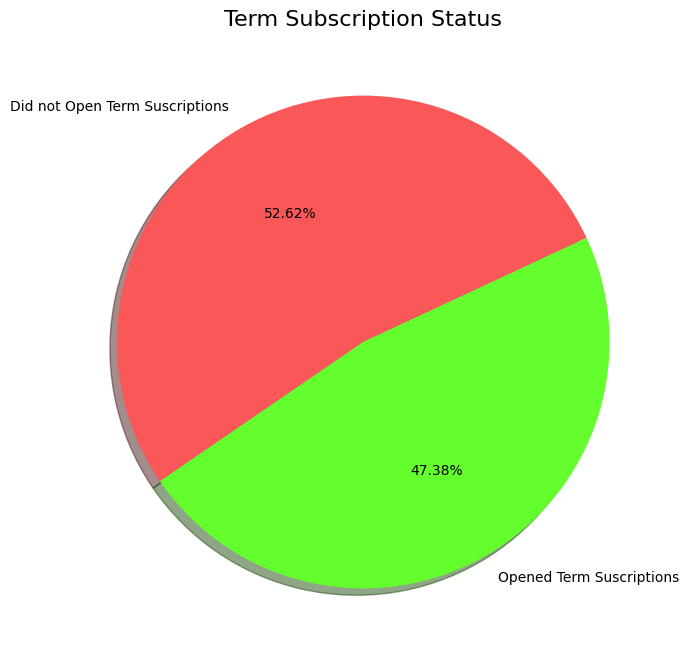

In [ ]:
colors = ["#FA5858", "#64FE2E"]
labels = "Did not Open Term Suscriptions", "Opened Term Suscriptions"

plt.figure(figsize=(8, 8))
plt.pie(df["deposit"].value_counts(), autopct='%1.2f%%', shadow=True, colors=colors, labels=labels, startangle=25)
plt.title('Term Subscription Status', fontsize=16)
plt.show()


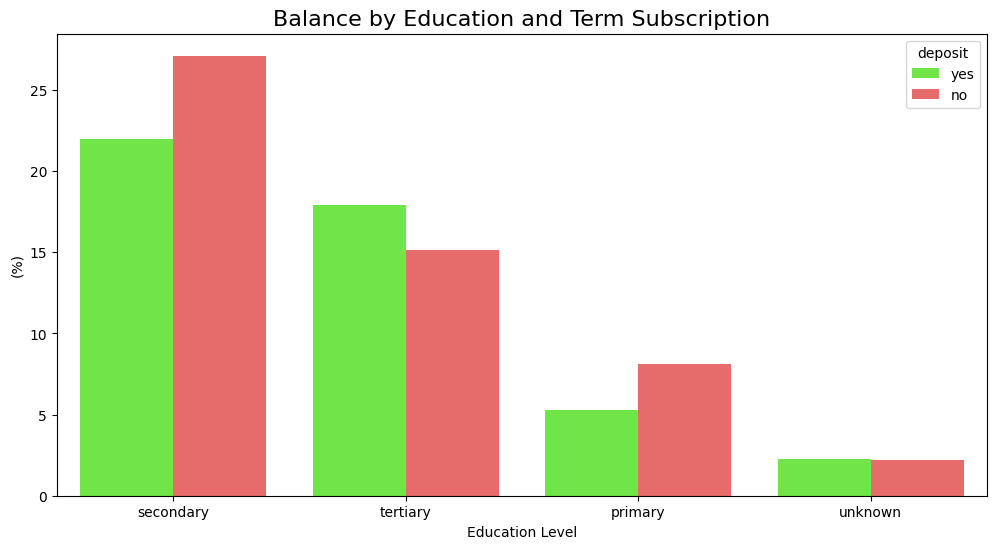

In [ ]:
palette = ["#64FE2E", "#FA5858"]

plt.figure(figsize=(12, 6))
sns.barplot(x="education", y="balance", hue="deposit", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
plt.ylabel("(%)")
plt.xlabel("Education Level")
plt.xticks(rotation=0)
plt.title('Balance by Education and Term Subscription', fontsize=16)
plt.show()


<ipython-input-8-fda7964c8e1a>:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



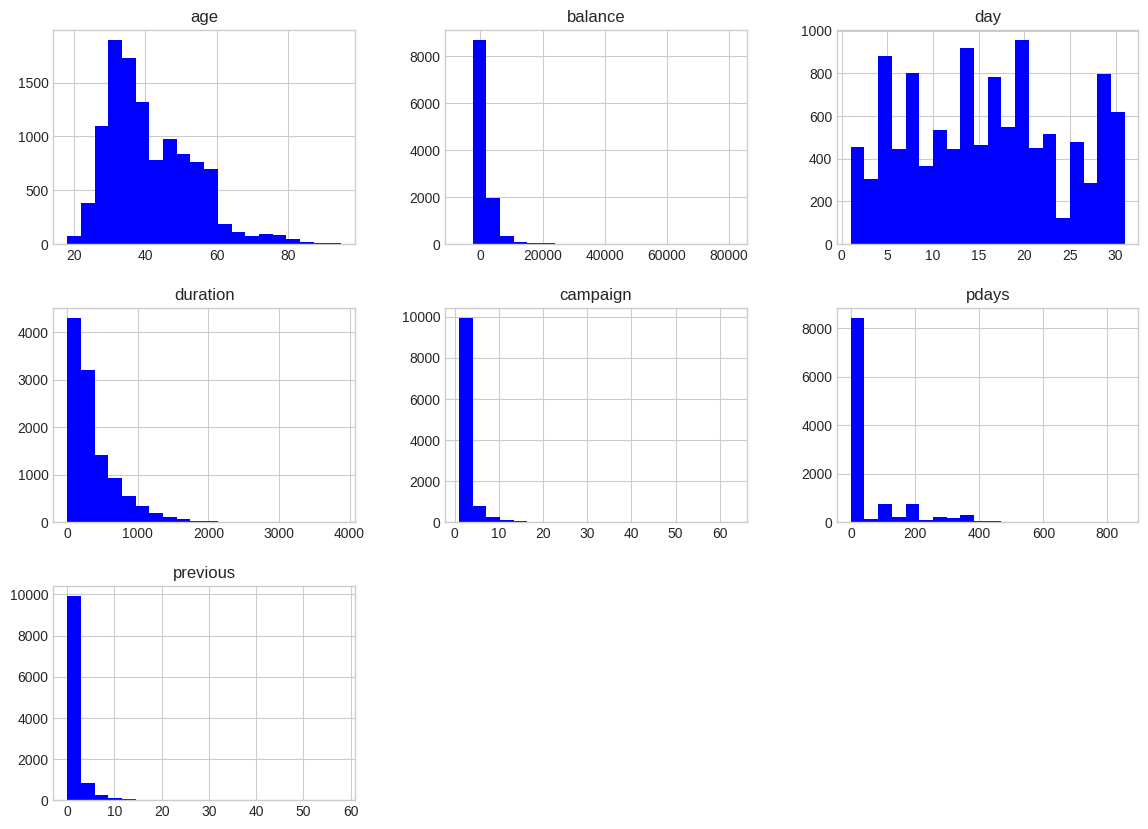

In [ ]:
plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(14,10), color='blue')
plt.show()

In [ ]:
# Drop the Job Occupations that are "Unknown"
df = df.drop(df.loc[df["job"] == "unknown"].index)

# Admin and management are basically the same let's put it under the same categorical value
lst = [df]

for col in lst:
    col.loc[col["job"] == "admin.", "job"] = "management"

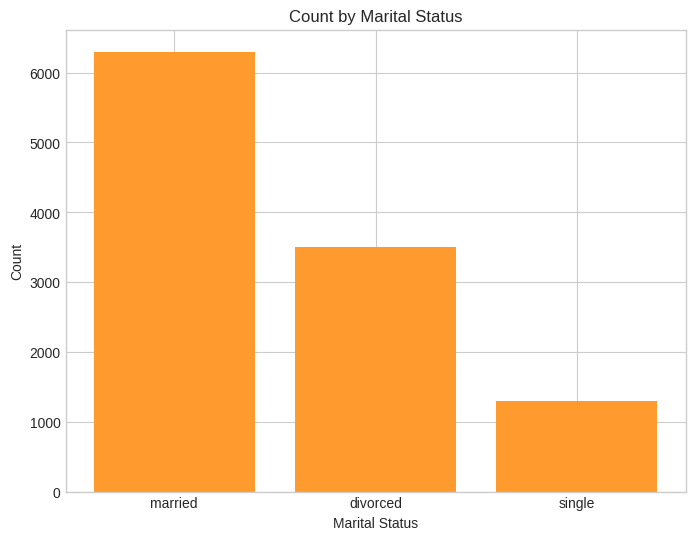

In [ ]:
vals = df['marital'].value_counts().tolist()
labels = ['married', 'divorced', 'single']

plt.figure(figsize=(8, 6))
plt.bar(labels, vals, color="#FE9A2E")
plt.title("Count by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()


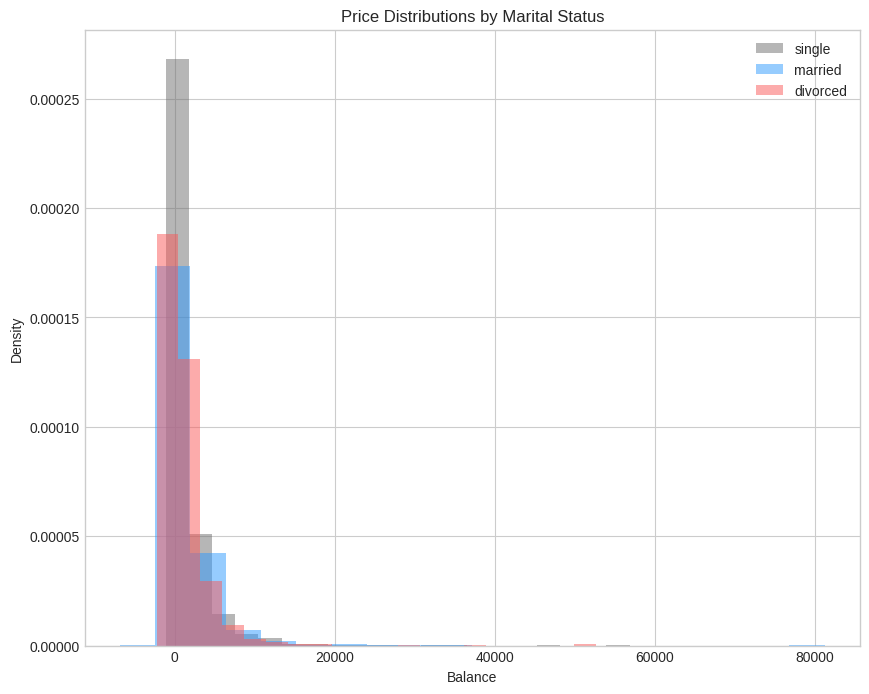

In [ ]:
single = df['balance'].loc[df['marital'] == 'single'].values
married = df['balance'].loc[df['marital'] == 'married'].values
divorced = df['balance'].loc[df['marital'] == 'divorced'].values

plt.figure(figsize=(10, 8))

plt.hist(single, bins=20, density=True, alpha=0.5, color='#6E6E6E', label='single')
plt.hist(married, bins=20, density=True, alpha=0.5, color='#2E9AFE', label='married')
plt.hist(divorced, bins=20, density=True, alpha=0.5, color='#FA5858', label='divorced')

plt.title("Price Distributions by Marital Status")
plt.xlabel("Balance")
plt.ylabel("Density")
plt.legend()
plt.show()


In [ ]:
df = df.drop(df.loc[df["education"] == "unknown"].index)
df['education'].unique()

array(['secondary', 'tertiary', 'primary'], dtype=object)

In [ ]:
# Create a new column 'marital/education' by combining 'marital' and 'education'
df['marital/education'] = df['marital'] + '/' + df['education']

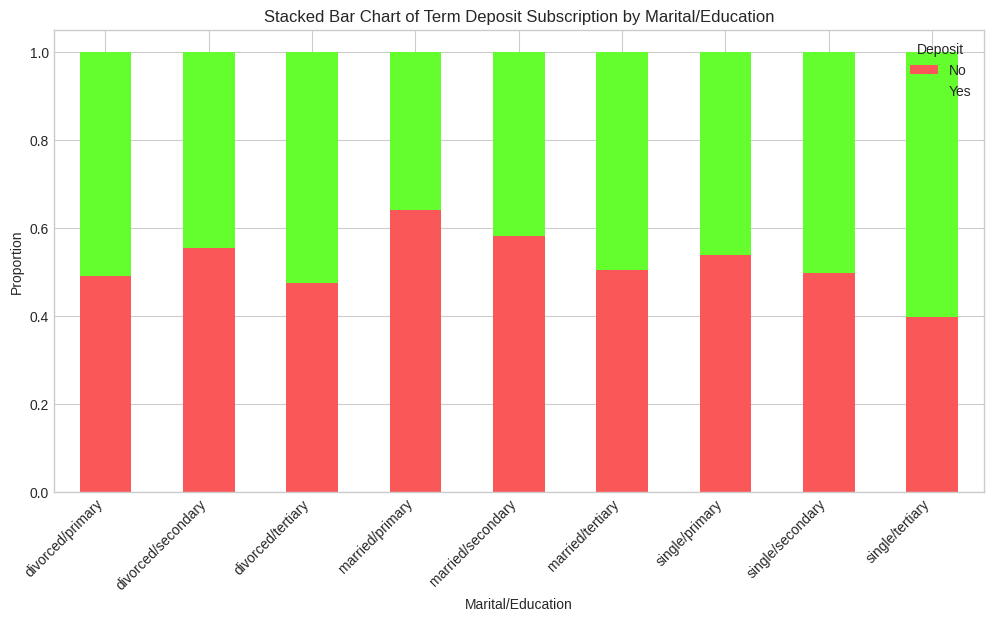

In [ ]:
# Create a crosstab to count 'deposit' values within each 'marital/education' group
cross_tab = pd.crosstab(df['marital/education'], df['deposit'], normalize='index')

# Plot a stacked bar chart
cross_tab.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#FA5858', '#64FE2E'])
plt.title("Stacked Bar Chart of Term Deposit Subscription by Marital/Education")
plt.xlabel("Marital/Education")
plt.ylabel("Proportion")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Deposit', loc='upper right', labels=['No', 'Yes'])
plt.show()


In [ ]:
df.drop(['marital/education'], axis=1, inplace=True)

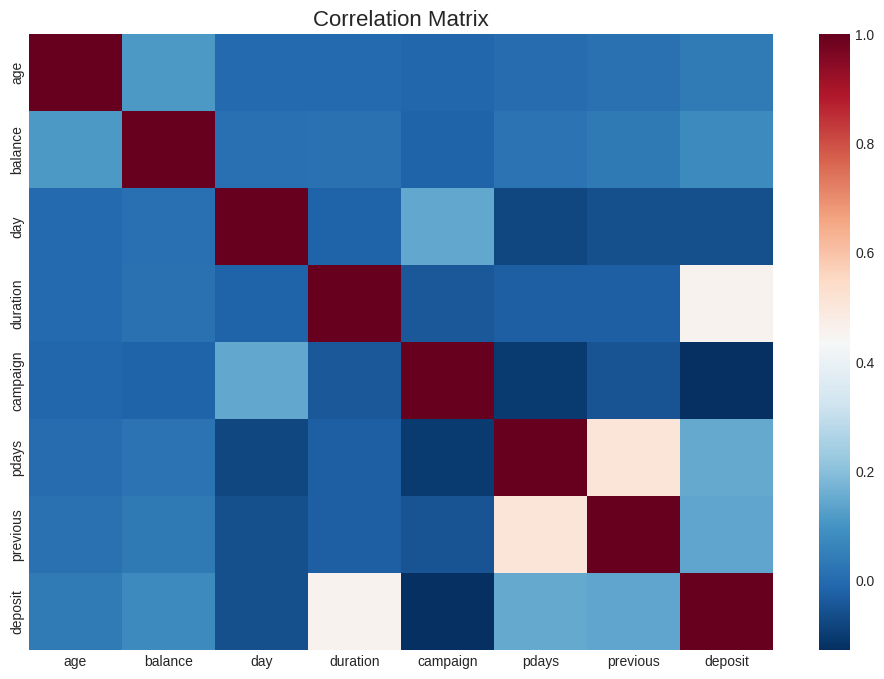

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
fig = plt.figure(figsize=(12,8))
df['deposit'] = LabelEncoder().fit_transform(df['deposit'])



# Separate both dataframes into
numeric_df = df.select_dtypes(exclude="object")
# categorical_df = df.select_dtypes(include="object")

corr_numeric = numeric_df.corr()


sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

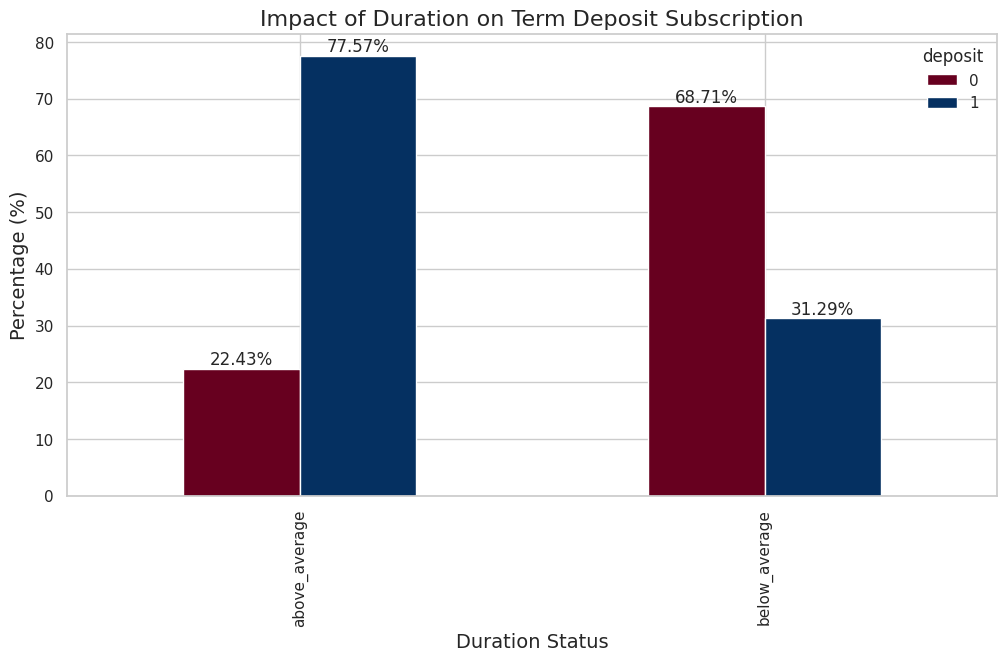

In [ ]:
# Set plot size and style
sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.set_style('whitegrid')

# Calculate the average duration
avg_duration = df['duration'].mean()

# Create a new column 'duration_status' based on average duration
df['duration_status'] = df['duration'].apply(lambda x: 'above_average' if x > avg_duration else 'below_average')

# Create a percentage table of term deposit status by duration status
pct_term = pd.crosstab(df['duration_status'], df['deposit'], normalize='index') * 100

# Plot a bar chart
ax = pct_term.plot(kind='bar', stacked=False, cmap='RdBu', figsize=(12, 6))
plt.title("Impact of Duration on Term Deposit Subscription", fontsize=16)
plt.xlabel("Duration Status", fontsize=14)
plt.ylabel("Percentage (%)", fontsize=14)

# Annotate the bars with percentages
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define features and target variable
X = term_deposits.drop(['deposit'], axis=1)
y = term_deposits['deposit']

# Define the columns to be scaled and one-hot encoded
numeric_features = ["age", "balance", "day", "campaign", "pdays", "previous", "duration"]
categorical_features = ["job", "education", "marital", "default", "housing", "loan", "contact", "month", "poutcome"]

# Apply StandardScaler to selected numeric columns
numeric_scaler = StandardScaler()
X[numeric_features] = numeric_scaler.fit_transform(X[numeric_features])

# Apply OneHotEncoder to selected categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_cols = encoder.fit_transform(X[categorical_features])
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_features))
X = pd.concat([X.drop(categorical_features, axis=1), encoded_df], axis=1)

# Split the scaled and encoded data into training and testing sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Now, X_train and X_test contain the scaled and one-hot encoded values
# You can proceed with your modeling using the preprocessed data


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an SVM classifier
svm_classifier = SVC()

# Fit the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.86


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a Logistic Regression classifier
logistic_classifier = LogisticRegression()

# Fit the Logistic Regression classifier on the training data
logistic_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logistic_classifier.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

